# Project 02 - Due Friday, November 11 at 12pm

*Objectives*: Gain experience loading a transactional dataset into a relational database model you define yourself and using SQL to explore its contents. Transform the data into a star schema, documenting the schema visually, and explore the transformed data analytically by writing and executing a number of SQL queries using common syntax and functions and describing your findings.  Gain practice working on these tasks with a partner.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries, diagrams, and charts in the space provided, unless a text answer is requested.  The notebook itself should be completely reproducible at datanotebook.org, from start to finish: another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Attestation*: **Work in pairs**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Friday, November 11, 12pm.  One member of each pair must submit your notebook to Blackboard; you should not both submit it separately.  You may each push a copy to your own GitHub repository.


## Setup - select and obtain data

The US City Open Data Census has a variety of [transactional data from all over the country](http://us-city.census.okfn.org/).  Select one topic and one city from this Census, download the data, and explain your reason for this choice before proceeding.  Provide a link to the web page for the data set you've chosen.

I strongly encourage you to select a dataset from among the following topics:  Crime, Property Assessment, Campaign Finance Contributions, Service Requests (311), and Web Analytics.

By *transactional* data I mean records at the grain of one event per business process.  In the case of Service Requests (311), for example, that would require data at the level of each individual report of a service request.  If this isn't clear, think about the bike trip data - each individual ride was included - and look for data at that level of event/process specificity.  Avoid data like the Connecticut boating data, which was summarized by year, not individual transactions.

Please aim for a dataset of at least 10,000 individual records, but less than 250,000 records.  A little more or a little less is okay, but try to stay within these limits.

# Choose the dataset
We choose to analyze the crime data of New York City. You can also access the dataset via:http://us-city.census.okfn.org/entry/newyorkcity/crime-stats. This dataset is being updated quarterly and is available at the incident level. The data set contains open crime data that helps communities make informed judgements about public safety.

Firstly, we download the dataset, rename the dataset and transfer into csv look:

## Name = "Abhinav Chandel" and "Linhui Fu"

In [3]:
!wget https://data.cityofnewyork.us/api/views/hyij-8hr7/rows.csv?accessType=DOWNLOAD

--2016-11-11 12:16:56--  https://data.cityofnewyork.us/api/views/hyij-8hr7/rows.csv?accessType=DOWNLOAD
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.199
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [  <=>                 ] 185.12M  1.84MB/s   in 1m 42s 

Last-modified header invalid -- time-stamp ignored.
2016-11-11 12:18:38 (1.82 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [194111037]



## Problem 1 - examine the data (20 points)

Use `csvstat`, `pandas`, or other tools as you see fit and observe the contents of your dataset.  Review important points from any metadata provided.  Describe what you see:  What do the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some opportunities, challenges, or questions you would like to ask?

In [4]:
!mv rows.csv?accessType=DOWNLOAD crime.csv

Renaming the file as crime.csv

In [5]:
!perl -pe 's;^,|,$|(?<=,),;data_n\/a,;g' crime.csv > crime_refined.csv

Cleaning the data, i.e replacing all the empty values by data_na

In [6]:
!csvcut crime_refined.csv | head -10 | csvlook

|-----------+------------+------------------------+-------------+------------------+----------------+-----------------+-----------------+----------------+--------------+---------------+--------------------------------+------------------------+----------+----------+-----------+---------------------+-------------+-------------+----------------------------------------|
|  OBJECTID | Identifier | Occurrence Date        | Day of Week | Occurrence Month | Occurrence Day | Occurrence Year | Occurrence Hour | CompStat Month | CompStat Day | CompStat Year | Offense                        | Offense Classification | Sector   | Precinct | Borough   | Jurisdiction        | XCoordinate | YCoordinate | Location 1                             |
|-----------+------------+------------------------+-------------+------------------+----------------+-----------------+-----------------+----------------+--------------+---------------+--------------------------------+------------------------+----------+--------

In [7]:
!csvcut -n crime_refined.csv

  1: OBJECTID
  2: Identifier
  3: Occurrence Date
  4: Day of Week
  5: Occurrence Month
  6: Occurrence Day
  7: Occurrence Year
  8: Occurrence Hour
  9: CompStat Month
 10: CompStat Day
 11: CompStat Year
 12: Offense
 13: Offense Classification
 14: Sector
 15: Precinct
 16: Borough
 17: Jurisdiction
 18: XCoordinate
 19: YCoordinate
 20: Location 1


#### Here we will post the meaning of each column:

1.2: ObjectId and Identifer are unique numbers assigned to each case,

3: Occurrence Date: represent the date and time when the rape offenses happen

4: Day of Week: Text representation of day of week on which the incident occurred

5: Occurrence Month: Three character abbreviation of month in which the incident occurred

6: Occurrence Day: Integer representation of day of month in which the incident occurred

7: Occurrence Year: Integer representation of year in which the incident occurred

8: Occurrence Hour: Integer representation of time when the incident occurred; based on 24 hour clock

9: CompStat Month: Three character abbreviation of month in which the incident was reported

10: CompStat Day: Integer representation of day of month in which the incident was reported

11: CompStat Year: Integer representation of year in which the incident was reported

12: Offense: Type of offense; currently aligned with the FBIs seven major felonies. GLMV is 
the same as Grand Larceny of Motor Vehicle

13: Offense Classification: Level of offense; felony, misdemeanor, violation

14: Sector: Single character indicating patrol sector within given precinct

15: Precinct: Three character representation of precinct in which incident occurred

16: Borough: Text representation of borough in which incident occurred

17: Jurisdiction: Internal jurisdiction responsible for incident (eg. NYPD, Transit or Housing)

18: XCoordinate: X-Coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, Units feet (FIPS 3104)

19: YCoordinate: Y-Coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, Units feet (FIPS 3104)

20: location: Latitude and Longitude Coordinates of the offenses in Global Coordinate System



In [8]:
!wc -l crime_refined.csv

1123466 crime_refined.csv


In [9]:
!csvcut crime_refined.csv | csvgrep -c12 -m 'RAPE' > rape.csv

Transferring all the data regarding the offesnse of Rape into rape.csv

In [10]:
!csvcut -n rape.csv 

  1: OBJECTID
  2: Identifier
  3: Occurrence Date
  4: Day of Week
  5: Occurrence Month
  6: Occurrence Day
  7: Occurrence Year
  8: Occurrence Hour
  9: CompStat Month
 10: CompStat Day
 11: CompStat Year
 12: Offense
 13: Offense Classification
 14: Sector
 15: Precinct
 16: Borough
 17: Jurisdiction
 18: XCoordinate
 19: YCoordinate
 20: Location 1


In [12]:
!csvcut -c3,4,5,6,7,8,14,15,16,17,20 rape.csv > rape_final.csv

#### Filter the data
Initially, we have information reagarding many types of offenses, but we only want to discuss abou the rape. Therefore, we firstly filter out information about other ofenses. We Transfer all the data regarding the offesnse of Rape into rape.csv

Then, there is 20 columns, but we are not gonna use all of them. we extract the columns that we are interested in -- Colums that shows the time, authority and the location of rape offenses. The reason that we are interested in these information is because we can use these 3 dimension to describe the geolocation of rape offense by time, district, authority.
Then we transer the subset into csvlook.

We plan to remove the ObjectID, IDdentifier as they are will not help us in any data analysis, Also removing the offense table as all of them are RAPE and offense classification as all of them are felony. Also removing CompStat as it is the time when the data was entered into the NY map system.


In [13]:
!csvcut -n rape_final.csv 

  1: Occurrence Date
  2: Day of Week
  3: Occurrence Month
  4: Occurrence Day
  5: Occurrence Year
  6: Occurrence Hour
  7: Sector
  8: Precinct
  9: Borough
 10: Jurisdiction
 11: Location 1


#### In this dataset, there are null values in some colums:

1.Occurrence Date

2.Day of Week

3.Occurrence Month

4.Occurrence Day

5.Occurrence Year

6.Occurrence Hour

7.Sector

However we cleaned the data and replaced them with data_n/a in the start.
 
#### We are using these data to answer following questions:
1.What's the specific geolocation of rape by time?

2.What's the specific geolocation of rape by authoriy?

3.What's the specific geolocation of rape by district?

## Problem 2 - define a database model, load the data, and explore (20 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset as it is in its raw form into the database, and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Explore the data to zero in on a few themes you would like to further study analytically.  Discuss columns that present opportunities for extraction into dimensions, and identify the specific columns that contain facts you want to measure.

In [14]:
%reload_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [15]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [16]:
!createdb -U dbuser Project21

In [17]:
%sql postgresql://dbuser@localhost:5432/Project21

'Connected: dbuser@Project21'

In [18]:
%%sql
DROP TABLE IF EXISTS rapecrimes;
CREATE TABLE rapecrimes (
    date CHAR(25),
    day CHAR(9),
    month CHAR(10),
    day_n CHAR(10),
    year CHAR(10),
    hour CHAR(5),
    sector CHAR(10),
    precint INT,
    borough CHAR(19),
    jur char(19),
    location POINT
    )


Done.
Done.


[]

Creating the source table which has all our data.

In [19]:
%%sql
COPY rapecrimes FROM '/home/jovyan/work/rape_final.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

13779 rows affected.


[]

Copying the data from the csv to the sql table

In [20]:
%%sql
SELECT count(*) FROM rapecrimes

1 rows affected.


count
13779


All the data has been transferred

In [21]:
%%sql
SELECT * FROM rapecrimes
LIMIT 3

3 rows affected.


date,day,month,day_n,year,hour,sector,precint,borough,jur,location
08/08/1994 06:00:00 PM,Monday,Aug,8,1994,18,A,103,QUEENS,N.Y. POLICE DEPT,"(40.707047475,-73.792611904)"
02/01/1995 08:00:00 AM,Wednesday,Feb,1,1995,8,G,83,BROOKLYN,N.Y. POLICE DEPT,"(40.697963515,-73.9180833619999)"
01/09/2000 08:00:00 PM,Sunday,Jan,9,2000,20,G,108,QUEENS,N.Y. POLICE DEPT,"(40.7430801680001,-73.954736461)"


The date,month, day_n, year,hour are time related and combine into one dimension, which can tell us a lot about the occurence of the crime.

We can find out on which days the maximum occurences have happened, or what is the trend of the occurences year by year. In a day what time is more prone to these occurences. Or is all of it just extremely random.

The sector and borough coloumns are also pretty interesting as it tells us which areas are more prone to the occurences and hence need more protection.

Also the precint and jurisdiction tells us under whose authority does the offence fall, and can tell us the load work of these authorities.

The location is the occurence of the crime, and is a countable value.

Exploring the data graphically below.

### Now we will do some simple queries:

#### 1. In which years does the rape tend to happen most frequently?

In [22]:
%%sql
select year,count(*) from rapecrimes
GROUP BY year
ORDER BY year DESC

31 rows affected.


year,count
data_n/a,3
2015,1156
2014,1204
2013,1294
2012,1372
2011,1382
2010,1351
2009,1175
2008,1255
2007,1265


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<Container object of 31 artists>

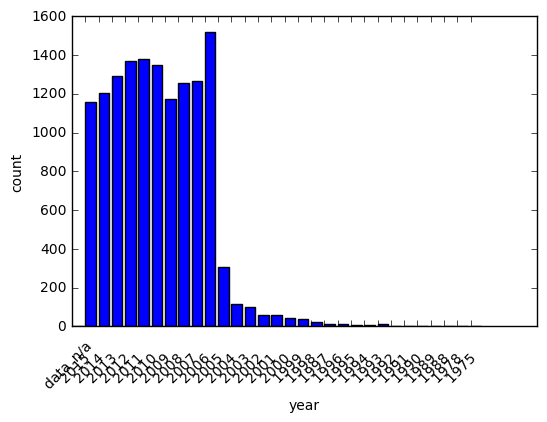

In [23]:
%matplotlib inline
result = _
result.bar()

#### 2. In which day of the week does the rape tend to happen most frequently?

In [24]:
%%sql
SELECT day,count(*) FROM rapecrimes
GROUP BY day
ORDER BY count desc

8 rows affected.


day,count
Saturday,2312
Sunday,2255
Friday,2067
Monday,1831
Thursday,1776
Wednesday,1769
Tuesday,1768
data_n/a,1


<Container object of 8 artists>

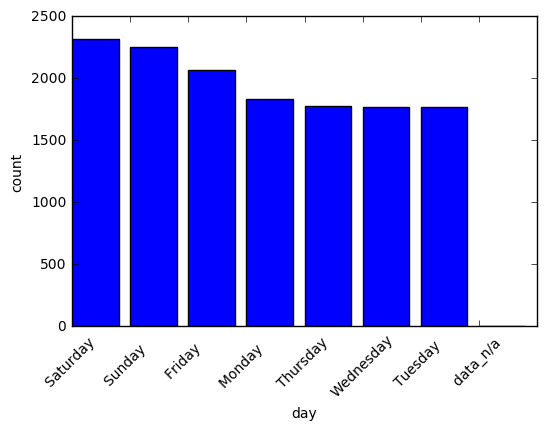

In [25]:
%matplotlib inline
result = _
result.bar()

#### 3. In which area does the rape tend to happen most frequently?

In [26]:
%%sql
SELECT borough,count(*) FROM rapecrimes
GROUP BY borough
ORDER BY count desc

5 rows affected.


borough,count
BROOKLYN,4097
QUEENS,3182
BRONX,3018
MANHATTAN,2941
STATEN ISLAND,541


<Container object of 5 artists>

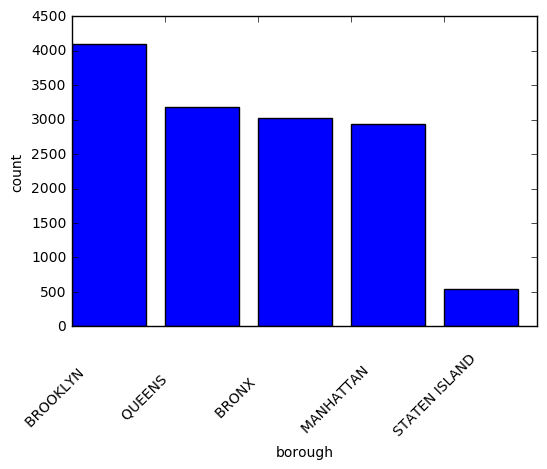

In [27]:
%matplotlib inline
result = _
result.bar()

## Problem 3 - define a star schema, and load your data into it (30 points)

Define a star schema consisting of at least one fact table and at least two dimensions.  Transform your source data into the new fact table and dimensions.  Discuss your key modeling decisions.

Document your star schema with a diagram.  There several tools available for this, such as Google Docs and Microsoft Visio.

#### Star Schema Design

On basis of the above exploration our model consists of one fact and two dimension tables. The fact table has the co-ordinates of the location where the offense occured, The dimesnion tables are as follows:
1. Location : Consists of the sector and borough where the offense happened 
2. Authority : Under whose authority is the offense occured
2. Time : The complete time history of the occurening of the offense



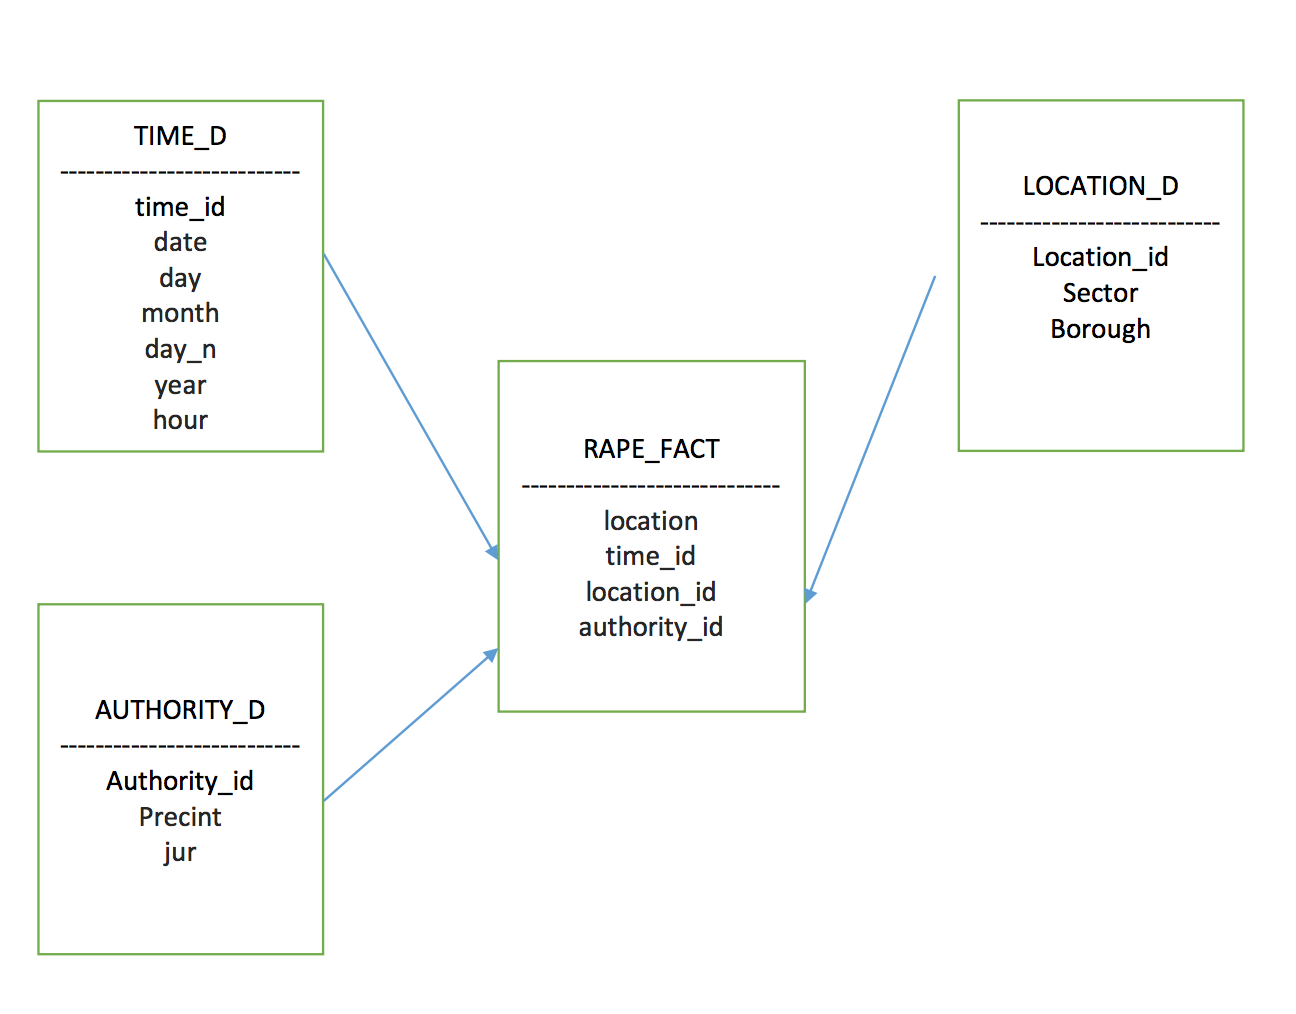

In [28]:
from IPython.display import Image
Image(filename='Star.png')

In [29]:
%%sql
select * from rapecrimes
LIMIT 3;

3 rows affected.


date,day,month,day_n,year,hour,sector,precint,borough,jur,location
08/08/1994 06:00:00 PM,Monday,Aug,8,1994,18,A,103,QUEENS,N.Y. POLICE DEPT,"(40.707047475,-73.792611904)"
02/01/1995 08:00:00 AM,Wednesday,Feb,1,1995,8,G,83,BROOKLYN,N.Y. POLICE DEPT,"(40.697963515,-73.9180833619999)"
01/09/2000 08:00:00 PM,Sunday,Jan,9,2000,20,G,108,QUEENS,N.Y. POLICE DEPT,"(40.7430801680001,-73.954736461)"


In [30]:
%%sql
DROP TABLE IF EXISTS location_D;
CREATE TABLE location_D(
    sector CHAR(10),
    borough CHAR(19)
);

Done.
Done.


[]

Creating the location Dimension Table

In [31]:
%%sql
INSERT INTO location_D
SELECT DISTINCT sector,borough from rapecrimes;

98 rows affected.


[]

Inserting data from the source table to the dimension table

In [32]:
%%sql
ALTER TABLE location_D
ADD COLUMN location_id SERIAL PRIMARY KEY;


Done.


[]

Adding a primary key which is unique to every row and will increment on addition of a new observation

In [33]:
%%sql
select * from location_D LIMIT 5

5 rows affected.


sector,borough,location_id
data_n/a,BRONX,1
C,MANHATTAN,2
A,STATEN ISLAND,3
T,QUEENS,4
Q,STATEN ISLAND,5


In [34]:
%%sql
DROP TABLE IF EXISTS time_D;
CREATE TABLE time_D (
    date CHAR(25),
    day CHAR(10),
    month CHAR(10),
    day_n CHAR(10),
    year CHAR(10),
    hour CHAR(10)
    )

Done.
Done.


[]

Creating the time dimension table

In [35]:
%%sql
INSERT INTO time_D
SELECT DISTINCT date,day,month,day_n,year,hour from rapecrimes;

12561 rows affected.


[]

Copying data from the source table to the time dimension table

In [36]:
%%sql
ALTER TABLE time_D
ADD COLUMN time_id SERIAL PRIMARY KEY;

Done.


[]

Creating a primary key time_id which is unique for every row and will be included in a new observatiomn set post incrementing

In [37]:
%%sql
DROP TABLE IF EXISTS authority_D;
CREATE TABLE authority_D(
    precint INT,
    jur CHAR(19)
);

Done.
Done.


[]

Creating the authority dimension table

In [38]:
%%sql
INSERT INTO authority_D
SELECT DISTINCT precint,jur from rapecrimes;

198 rows affected.


[]

In [39]:
%%sql
ALTER TABLE authority_D
ADD COLUMN authority_id SERIAL PRIMARY KEY;

Done.


[]

Craeting the auto incremented Primary Key

In [40]:
%%sql
DROP TABLE IF EXISTS rape_fact;
CREATE TABLE rape_fact (
    location POINT,
    time_id INT,
    location_id INT,
    authority_id INT,
    FOREIGN KEY (time_id) REFERENCES time_D(time_id),
    FOREIGN KEY (location_id) REFERENCES location_D(location_id),
    FOREIGN KEY (authority_id) REFERENCES authority_D(authority_id)
)

Done.
Done.


[]

Creating the fact table. Consist of the location co-ordinates, a foreign key time_id which points to the time dimension table, location_id foreign key which points to the location dimension table, authority_id foreign key which points to the authority dimension table.

In [41]:
%%sql
INSERT INTO rape_fact 
SELECT rapecrimes.location,time_D.time_id,location_D.location_id,authority_D.authority_id
FROM rapecrimes
JOIN
time_D
ON rapecrimes.date=time_D.date
AND rapecrimes.day=time_D.day
AND rapecrimes.month=time_D.month
AND rapecrimes.day_n=time_D.day_n
AND rapecrimes.year=time_D.year
AND rapecrimes.hour=time_D.hour
JOIN
location_D
ON 
rapecrimes.sector=location_D.sector
AND rapecrimes.borough=location_D.borough 
JOIN
authority_D
ON
rapecrimes.precint=authority_D.precint
AND rapecrimes.jur=authority_D.jur;


13779 rows affected.


[]

In [42]:
%%sql
select count(*) from rape_fact

1 rows affected.


count
13779


## What is the trend of the offense year by year?

In [43]:
%%sql
select time_D.year, count(rape_fact.location)
FROM time_D
JOIN
rape_fact
ON
time_D.time_id=rape_fact.time_id
GROUP BY time_D.year
HAVING time_D.year <> 'data_n/a'
ORDER BY time_D.year DESC



30 rows affected.


year,count
2015,1156
2014,1204
2013,1294
2012,1372
2011,1382
2010,1351
2009,1175
2008,1255
2007,1265
2006,1520


<Container object of 30 artists>

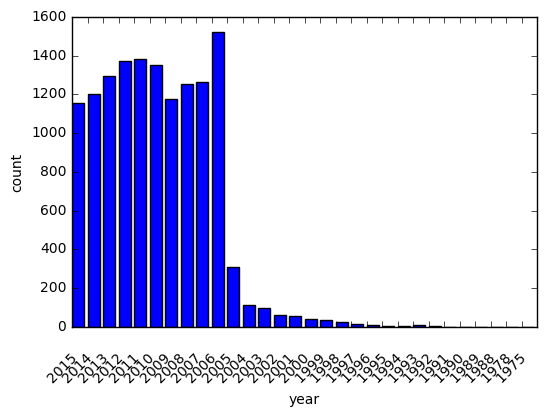

In [44]:
%matplotlib inline
result=_
result.bar()

## Problem 4 - explore your data in its new schema (30 points)

Strictly using the dimensional model tables you defined and populated for Problem 3, explore your data in its new form.  Use any of the query strategies we've seen in class, including transformations, aggregates, subqueries, rollups, and, of course, joins.  Add plots to highlight particular themes that stand out.  Describe your thinking and observations along the way.

### Which is the area which has most offenses of Rape

In [45]:
%%sql
select location_D.borough, count(rape_fact.location)
FROM location_D
JOIN
rape_fact
ON
location_D.location_id=rape_fact.time_id
GROUP BY location_D.borough
HAVING location_D.borough <> 'data_n/a'
ORDER BY count DESC

5 rows affected.


borough,count
QUEENS,22
BRONX,21
BROOKLYN,19
STATEN ISLAND,19
MANHATTAN,18


<Container object of 5 artists>

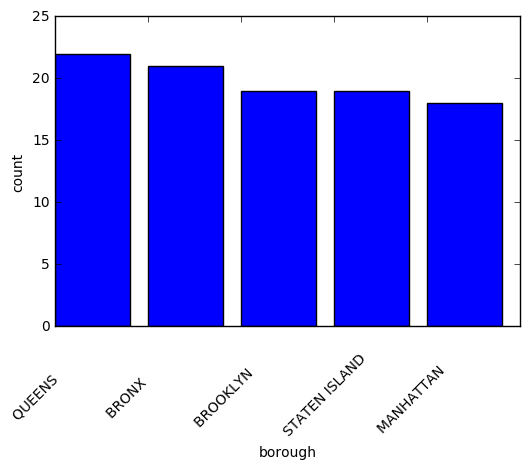

In [46]:
%matplotlib inline
result=_
result.bar()

### Which Precint has the maximum rape cases registered

In [47]:
%%sql
select authority_D.precint, count(rape_fact.location)
FROM authority_D
JOIN
rape_fact
ON
authority_D.authority_id=rape_fact.authority_id
GROUP BY authority_D.precint
ORDER BY count DESC
LIMIT 5


5 rows affected.


precint,count
75,581
120,374
115,359
43,355
44,350


<Container object of 5 artists>

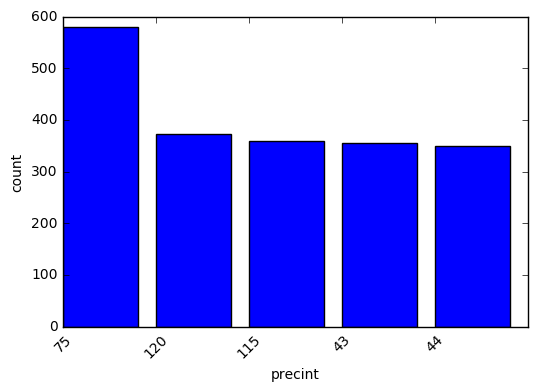

In [48]:
%matplotlib inline
result=_
result.bar()

### How many offenses are registerd in precints in each Borough?

In [49]:
%%sql
SELECT location_D.borough,authority_D.precint,count(rape_fact.location)
FROM rape_fact
JOIN
authority_D
ON rape_fact.authority_id=authority_D.authority_id
JOIN
location_D
ON rape_fact.location_id=location_D.location_id
GROUP BY ROLLUP (location_D.borough,authority_D.precint)


83 rows affected.


borough,precint,count
BRONX,40,281
BRONX,41,175
BRONX,42,258
BRONX,43,355
BRONX,44,350
BRONX,45,131
BRONX,46,314
BRONX,47,337
BRONX,48,254
BRONX,49,190


### How many offenses were reported in each borough each day of the week?

In [50]:
%%sql
SELECT location_D.borough,time_D.day,count(rape_fact.location)
FROM rape_fact
JOIN
time_D
ON rape_fact.authority_id=time_D.time_id
JOIN
location_D
ON rape_fact.location_id=location_D.location_id
GROUP BY ROLLUP (location_D.borough,time_D.day)


38 rows affected.


borough,day,count
BRONX,Friday,534
BRONX,Monday,709
BRONX,Saturday,20
BRONX,Sunday,569
BRONX,Thursday,299
BRONX,Tuesday,585
BRONX,Wednesday,302
BRONX,None,3018
BROOKLYN,Friday,391
BROOKLYN,Monday,756


## Bonus (10 points for one of A or B)

## Automating ETL

To some extent the process of this schema desgin could be automated, but not completely. To create this schema desgin, it is neccessary to understands what are the facts and what are the contexts in which these facts are stated, i.e. what is my fact tables and what are my dimension tables. This process needs human intervention as every database would be different. A program can be written which can load all the data in the source table and then it will have to ask the user which columns need to be in the fact table and which in the dimension table, once loaded the PK and the FK for the tables can be automated. Completely automating the quality check is also not possible. It all depends upon the problems that the data is facing. Perhaps some issues like empty cells can be automated, but then again what if the data is encoded in a certain way which is unreadable by our SQL tables, in such a case human interventions become necessary. Some of the checks that would be in place is the following
1. Ensuring that Null Data is taken care of
2. That the data is in a recognised format
3. That the range of the data is proper according to the columns i.e. it smells right
4. All the data is transferred, wheneverd moved from one location to another